In [2]:
import cv2
import os
from matplotlib import pyplot as plt
video = cv2.VideoCapture("video_Trim.mp4")

In [8]:
width = video.get(cv2.CAP_PROP_FRAME_WIDTH )
height = video.get(cv2.CAP_PROP_FRAME_HEIGHT )
fps =  video.get(cv2.CAP_PROP_FPS)
num_frames=video.get(cv2.CAP_PROP_FRAME_COUNT)

In [3]:
[width,height,num_frames,fps]

[1280.0, 720.0, 92.0, 30.0]

Extract and save frames from the video

In [17]:
count = 0

while(True):

	# reading from frame
	ret,frame = video.read()

	if ret:
		# if video is still left continue creating images

		print ('Creating frame' + str(count))

		# writing the extracted images
		cv2.imwrite("frame%d.jpg" % count, frame)

		# increasing counter so that it will
		# show how many frames are created
		count += 1
	else:
		break
video.release()
cv2.destroyAllWindows()

Creating frame0
Creating frame1
Creating frame2
Creating frame3
Creating frame4
Creating frame5
Creating frame6
Creating frame7
Creating frame8
Creating frame9
Creating frame10
Creating frame11
Creating frame12
Creating frame13
Creating frame14
Creating frame15
Creating frame16
Creating frame17
Creating frame18
Creating frame19
Creating frame20
Creating frame21
Creating frame22
Creating frame23
Creating frame24
Creating frame25
Creating frame26
Creating frame27
Creating frame28
Creating frame29
Creating frame30
Creating frame31
Creating frame32
Creating frame33
Creating frame34
Creating frame35
Creating frame36
Creating frame37
Creating frame38
Creating frame39
Creating frame40
Creating frame41
Creating frame42
Creating frame43
Creating frame44
Creating frame45
Creating frame46
Creating frame47
Creating frame48
Creating frame49
Creating frame50
Creating frame51
Creating frame52
Creating frame53
Creating frame54
Creating frame55
Creating frame56
Creating frame57
Creating frame58
Creatin

Show a frame every 50ms

In [8]:
count = 0
import cv2
video = cv2.VideoCapture("video_Trim.mp4")

while(True):

	# reading from frame
	ret,frame = video.read()

	if ret:



		cv2.waitKey(50)
		cv2.imshow('image',frame)

		cv2.destroyAllwindows()


		count += 1
	else:
		break
video.release()
cv2.destroyAllWindows()



AttributeError: module 'cv2' has no attribute 'destroyAllwindows'

Grayscale frames

In [3]:
# Used as counter variable
count = 0

while(True):

	# reading from frame
	ret,frame = video.read()

	if ret:
		# if video is still left continue creating images

		print ('Creating grayscale frame ' + str(count))

		# writing the extracted images
		grayscale=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)


		# Saves the frames with frame-count
		cv2.imwrite("frame_gray%d.jpg" % count, grayscale)

		# increasing counter so that it will
		# show how many frames are created
		count += 1
	else:
		break
video.release()
cv2.destroyAllWindows()




Creating grayscale frame 0
Creating grayscale frame 1
Creating grayscale frame 2
Creating grayscale frame 3
Creating grayscale frame 4
Creating grayscale frame 5
Creating grayscale frame 6
Creating grayscale frame 7
Creating grayscale frame 8
Creating grayscale frame 9
Creating grayscale frame 10
Creating grayscale frame 11
Creating grayscale frame 12
Creating grayscale frame 13
Creating grayscale frame 14
Creating grayscale frame 15
Creating grayscale frame 16
Creating grayscale frame 17
Creating grayscale frame 18
Creating grayscale frame 19
Creating grayscale frame 20
Creating grayscale frame 21
Creating grayscale frame 22
Creating grayscale frame 23
Creating grayscale frame 24
Creating grayscale frame 25
Creating grayscale frame 26
Creating grayscale frame 27
Creating grayscale frame 28
Creating grayscale frame 29
Creating grayscale frame 30
Creating grayscale frame 31
Creating grayscale frame 32
Creating grayscale frame 33
Creating grayscale frame 34
Creating grayscale frame 35
Cr

Heuristic Thresholding

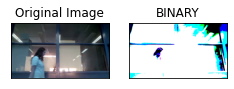

In [12]:
def find_nearest1(array,value):
    idx,val = min(enumerate(array), key=lambda x: abs(x[1]-value))
    return idx
T=30
img=cv2.imread("C:/Users/Ranim Saidi/PycharmProjects/pythonProject18/frame10.jpg")
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
T_old=20
while T_old-T >=5:
	m1=sum(hist_full[:T-1])/len(hist_full[:T-1])
	m2=sum(hist_full[T:])/len(hist_full[T:])
	print(T,m1,m2)
	T_old=T
	T=find_nearest1(hist_full,(m1+m2)/2)



ret,thresh1 = cv2.threshold(img,T,255,cv2.THRESH_BINARY)
plt.close('all')
titles = ['Original Image','BINARY']
images = [img, thresh1]
for i in range(2):
	plt.subplot(2,3,i+1),plt.imshow(images[i],vmin=0,vmax=255,cmap='gray')
	plt.title(titles[i])
	plt.xticks([]),plt.yticks([])
plt.show()

Otsu thresholding

In [12]:
count = 0
import cv2
video = cv2.VideoCapture("video_Trim.mp4")

while(True):

	# reading from frame
	ret,frame = video.read()

	if ret:


		image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
		gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
		gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
		# writing the extracted images
		ret,image_otsu = cv2.threshold(gray,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


		# Saves the frames with frame-count
		cv2.imshow("Real Scene" ,gray)
		cv2.imshow("Otsu Transformation" ,image_otsu)
		cv2.waitKey(50)

		# increasing counter so that it will
		# show how many frames are created
		count += 1
	else:
		break


Segmentation temporelle: Soustraction d'image

In [2]:
import cv2

video = cv2.VideoCapture("video_Trim.mp4")
liste=[]
i=0

# running the loop
while(video.isOpened()):

	# extracting the frames
	success, current = video.read()

	if  success:
		image = cv2.cvtColor(current, cv2.COLOR_BGR2RGB)
		gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

		if i<1:
			liste.append(gray)

		else:

			result=cv2.absdiff(liste[i-1],gray)
			_, result = cv2.threshold(result,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
			cv2.imshow('Real scene',liste[i-1])
			cv2.imshow('FrameSubstraction with previous frame',result)

			liste.append(gray)


		i+=1

		key = cv2.waitKey(100)

	else:
		print( "Success")
		#end of the video
		video.release()
		cv2.destroyAllWindows()

		break




Success


Différentiation de 3 frames

In [15]:
import cv2
import numpy as np
timeLapse=2

video = cv2.VideoCapture("video_Trim.mp4")
liste=[]
i=0
kernel = np.ones((7,7),np.uint8)   #for opening and closing operations


while(video.isOpened()):

	# extracting the frames
	ret, frame = video.read()

	if  ret:
		image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
		gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)




		if i < 2*timeLapse:
			liste.append(gray)

		else:


			print('Previous frame:',i-2*timeLapse+1)
			print('Current frame:',i-timeLapse)
			print('Next frame:',i-1)
			print('***********')


			result1=cv2.absdiff(liste[i-2*timeLapse+1],liste[i-timeLapse])
			result2=cv2.absdiff(liste[i-1],liste[i-timeLapse])

			result = cv2.bitwise_and(result1, result2)           #logical AND between (t,t-timeLapse) and (t,t+timeLapse)

			cv2.imshow('Real scene',liste[i-timeLapse])

			_, result = cv2.threshold(result,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)



			result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)



			cv2.imshow('Three_fr_Differencing: '+str(timeLapse-1)+' frames',result)

			liste.append(gray)


		i+=1

		key = cv2.waitKey(100)
		if key == ord("q"):
			break
	else:
		#end of the video
		print( "FIN DE LA VIDÉO")
		video.release()
		cv2.destroyAllWindows()

		break









Previous frame: 1
Current frame: 2
Next frame: 3
***********
Previous frame: 2
Current frame: 3
Next frame: 4
***********
Previous frame: 3
Current frame: 4
Next frame: 5
***********
Previous frame: 4
Current frame: 5
Next frame: 6
***********
Previous frame: 5
Current frame: 6
Next frame: 7
***********
Previous frame: 6
Current frame: 7
Next frame: 8
***********
Previous frame: 7
Current frame: 8
Next frame: 9
***********
Previous frame: 8
Current frame: 9
Next frame: 10
***********
Previous frame: 9
Current frame: 10
Next frame: 11
***********
Previous frame: 10
Current frame: 11
Next frame: 12
***********
Previous frame: 11
Current frame: 12
Next frame: 13
***********
Previous frame: 12
Current frame: 13
Next frame: 14
***********
Previous frame: 13
Current frame: 14
Next frame: 15
***********
Previous frame: 14
Current frame: 15
Next frame: 16
***********
Previous frame: 15
Current frame: 16
Next frame: 17
***********
Previous frame: 16
Current frame: 17
Next frame: 18
***********


Adaptive Background Substruction

In [6]:
import cv2

timeLapse=2

video = cv2.VideoCapture("video_Trim.mp4")
liste=[]
i=0
alpha=0.6

while(video.isOpened()):

	# extracting the frames
	ret, frame = video.read()

	if  ret:
		image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
		gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

		if i<timeLapse:
			liste.append(gray)

		else:


			result = cv2.addWeighted(gray, alpha, liste[i-timeLapse], 1-alpha, 0.0)
			_, result = cv2.threshold(result,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)



			cv2.imshow('Real scene',gray)


			cv2.imshow('FrameSubstraction with '+str(timeLapse)+' frames for alpha= {:.1f}'.format(alpha)
					   ,result)

			liste.append(result)


		i+=1

		key = cv2.waitKey(100)
		if key == ord("q"):
			print( "Vidéo arretée")
			break
	else:
		print( "FIN DE LA VIDÉO")
		#end of the video
		video.release()
		cv2.destroyAllWindows()

		break







FIN DE LA VIDÉO


Background Substructor: MOG

In [3]:
import cv2

video = cv2.VideoCapture("video_Trim.mp4")
liste=[]
i=0
backSub = cv2.createBackgroundSubtractorMOG2()
# running the loop
while(video.isOpened()):

	# extracting the frames
	success, current = video.read()

	if  success:
		image = cv2.cvtColor(current, cv2.COLOR_BGR2RGB)
		gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

		fgMask = backSub.apply(gray)
		cv2.imshow('Real Scene', gray)
		cv2.imshow('MOG Mask', fgMask)


		key = cv2.waitKey(100)

	else:
		print( "Success")
		#end of the video
		video.release()
		cv2.destroyAllWindows()




Success


KNN Background Substructor

In [14]:
import cv2

video = cv2.VideoCapture("video_Trim.mp4")
liste=[]
i=0
backSub = cv2.createBackgroundSubtractorKNN()
# running the loop
while(video.isOpened()):

	# extracting the frames
	ret, frame = video.read()

	if  ret:
		image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
		gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

		fgMask = backSub.apply(gray)
		cv2.imshow('Real Scene', gray)
		cv2.imshow('KNN Mask', fgMask)


		key = cv2.waitKey(100)

	else:
		print( "Success")
		#end of the video
		video.release()
		cv2.destroyAllWindows()

Success
